# import warnings
warnings.simplefilter('ignore')

In [1]:
#general imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import os
import glob

from scipy.stats import ttest_1samp, ttest_ind

#nilearn imports
from nilearn import datasets, plotting
from nilearn import image
from nilearn.plotting import plot_connectome

#parcellation imports
from nilearn.maskers import NiftiMasker
from nilearn.input_data import NiftiLabelsMasker
from nilearn.maskers import NiftiSpheresMasker
from nilearn.datasets import fetch_localizer_contrasts

#parcellation atlas mapper
from fetcher import fetch_difumo

#correlation matrix
from nilearn.connectome import ConnectivityMeasure

#graph imports
import networkx as nx

/Users/hema/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
#Qiskit imports
from qiskit_aer import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp, StableSet, ExactCover, VertexCover, Clique, GraphPartition, VehicleRouting
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE, NumPyMinimumEigensolver, QAOA
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms.eigensolvers import NumPyEigensolver

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.translators import from_docplex_mp

from qiskit_optimization.converters import LinearEqualityToPenalty, InequalityToEquality, IntegerToBinary, QuadraticProgramToQubo

In [3]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
#from cdlib import algorithms
from qiskit.circuit.library import QAOAAnsatz

In [4]:
pd.set_option('display.max_columns', None)

#### peking1

In [5]:
path = 'Peking_1_2'
rest_files_peking1 = glob.glob(os.path.join(path,'*/*.*nii.gz'))
#confound_files = glob.glob(os.path.join(path,'*/*regressors.csv'))
phenotypes_peking1 = pd.read_csv(os.path.join(path,'Peking_1_phenotypic.csv'))

In [6]:
print(phenotypes_peking1.shape)
len(rest_files_peking1)

(85, 23)


85

In [7]:
#removing the records with invalid adhd scores
phenotypes_peking1 = phenotypes_peking1.drop(phenotypes_peking1[
                                            (phenotypes_peking1['Hyper/Impulsive']==-999.0)|
                                            (phenotypes_peking1['Inattentive']==-999.0)|
                                            (phenotypes_peking1['ADHD Index']==-999.0)].index)  
#'ADHD Index', 'Inattentive',
       #'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ', 'Performance IQ',

In [8]:
phenotypes_peking1 = phenotypes_peking1.drop(phenotypes_peking1[(phenotypes_peking1['DX']==0) &
                                            ((phenotypes_peking1['Verbal IQ']==-999.0)|
                                            (phenotypes_peking1['Performance IQ']==-999.0))].index)  


In [9]:
phenotypes_peking1.shape

(73, 23)

#### removing the records with a secondary diagnosis

In [10]:
#removing the records with a secondary diagnosis
phenotypes_peking1_noSecDx = phenotypes_peking1[phenotypes_peking1['Secondary Dx '].isin([np.NAN])]

In [11]:
phenotypes_peking1_noSecDx.shape

(62, 23)

In [12]:
#phenotype_adhd_peking_nosecdx[(phenotype_adhd_peking_nosecdx['DX']==3)|(phenotype_adhd_peking_nosecdx['DX']==0)|
#                             (phenotype_adhd_peking_nosecdx['DX']==1)]

In [13]:
#excluding subjects(0 & 3) with secondary diagnosis  
phenotypes_peking1_03 = phenotypes_peking1[((phenotypes_peking1['DX']==3)|(phenotypes_peking1['DX']==0))&
                                            (phenotypes_peking1['Secondary Dx '].isin([np.NAN]))]
phenotypes_peking1_03.shape

(59, 23)

In [14]:
#excluding subjects(0 & 1) with secondary diagnosis  
phenotypes_peking1_01 = phenotypes_peking1[((phenotypes_peking1['DX']==1)|(phenotypes_peking1['DX']==0))&
                                            (phenotypes_peking1['Secondary Dx '].isin([np.NAN]))]
phenotypes_peking1_01.shape

(53, 23)

#### peking2

In [15]:
path = 'Peking_2'
rest_files_peking2 = glob.glob(os.path.join(path,'*/*.*nii.gz'))
#confound_files = glob.glob(os.path.join(path,'*/*regressors.csv'))
phenotypes_peking2 = pd.read_csv(os.path.join(path,'Peking_2_phenotypic.csv'))
phenotypes_peking2 = phenotypes_peking2.drop(phenotypes_peking2[
                                            (phenotypes_peking2['Hyper/Impulsive']==-999.0)|
                                            (phenotypes_peking2['Inattentive']==-999.0)|
                                            (phenotypes_peking2['ADHD Index']==-999.0)|
                                            (phenotypes_peking2['IQ Measure']==-999.0)|
                                            (phenotypes_peking2['Verbal IQ']==-999.0)|
                                            (phenotypes_peking2['Performance IQ']==-999.0)].index) 

In [16]:
print(len(rest_files_peking2))
phenotypes_peking2.shape

67


(60, 23)

In [17]:
#only tdc, adhd3
phenotypes_peking2_0_3 = phenotypes_peking2[(phenotypes_peking2['DX']==3)|(phenotypes_peking2['DX']==0)]

In [18]:
phenotypes_peking2_0_3.shape

(46, 23)

In [19]:
#removing the records with a secondary diagnosis
phenotypes_peking2_noSecDx = phenotypes_peking2[phenotypes_peking2['Secondary Dx '].isin([np.NAN])]
phenotypes_peking2_noSecDx.shape

(47, 23)

In [20]:
#excluding subjects(0 & 3) with secondary diagnosis  
phenotypes_peking2_03 = phenotypes_peking2[((phenotypes_peking2['DX']==3)|(phenotypes_peking2['DX']==0))&
                                            (phenotypes_peking2['Secondary Dx '].isin([np.NAN]))]
phenotypes_peking2_03.shape

(39, 23)

In [21]:
#phenotypes_peking2[(phenotypes_peking2['DX']==3)|(phenotypes_peking2['DX']==0)]['Secondary Dx ']

In [22]:
#excluding subjects(0 & 1) with secondary diagnosis  
phenotypes_peking2_01 = phenotypes_peking2[((phenotypes_peking2['DX']==1)|(phenotypes_peking2['DX']==0))&
                                            (phenotypes_peking2['Secondary Dx '].isin([np.NAN]))]
phenotypes_peking2_01.shape

(35, 23)

#### peking3

In [23]:
path = 'Peking_3'
rest_files_peking3 = glob.glob(os.path.join(path,'*/*.*nii.gz'))
#confound_files = glob.glob(os.path.join(path,'*/*regressors.csv'))
phenotypes_peking3 = pd.read_csv(os.path.join(path,'Peking_3_phenotypic.csv'))
phenotypes_peking3 = phenotypes_peking3.drop(phenotypes_peking3[
                                            (phenotypes_peking3['Hyper/Impulsive']==-999.0)|
                                            (phenotypes_peking3['Inattentive']==-999.0)|
                                            (phenotypes_peking3['ADHD Index']==-999.0)|
                                            (phenotypes_peking3['IQ Measure']==-999.0)|
                                            (phenotypes_peking3['Verbal IQ']==-999.0)|
                                            (phenotypes_peking3['Performance IQ']==-999.0)].index) 

In [24]:
print(len(rest_files_peking3))
phenotypes_peking3.shape

42


(38, 23)

In [25]:
#only tdc, adhd3
phenotypes_peking3_0_3 = phenotypes_peking3[(phenotypes_peking3['DX']==3)|(phenotypes_peking3['DX']==0)]
phenotypes_peking3_0_3.shape

(31, 23)

In [26]:
#removing the records with a secondary diagnosis
phenotypes_peking3_noSecDx = phenotypes_peking3[phenotypes_peking3['Secondary Dx '].isin([np.NAN])]
phenotypes_peking3_noSecDx.shape

(22, 23)

In [27]:
#excluding subjects(0 & 3) with secondary diagnosis  
phenotypes_peking3_03 = phenotypes_peking3[((phenotypes_peking3['DX']==3)|(phenotypes_peking3['DX']==0))&
                                          (phenotypes_peking3['Secondary Dx '].isin([np.NAN]))]
phenotypes_peking3_03.shape

(21, 23)

In [28]:
#excluding subjects(0 & 1) with secondary diagnosis  
phenotypes_peking3_01 = phenotypes_peking3[((phenotypes_peking3['DX']==1)|(phenotypes_peking3['DX']==0))&
                                          (phenotypes_peking3['Secondary Dx '].isin([np.NAN]))]
phenotypes_peking3_01.shape

(21, 23)

#### merge peking1 ,2 and 3 - all fields intact

In [29]:
phenotype_allpeking = pd.concat([phenotypes_peking1[phenotypes_peking1['DX']!=0],
                                phenotypes_peking2[phenotypes_peking2['DX']!=0],
                                phenotypes_peking3[phenotypes_peking3['DX']!=0]],
                                axis=0 , ignore_index=True)
phenotype_tdc_peking = pd.concat([phenotypes_peking1[phenotypes_peking1['DX']==0],
                                phenotypes_peking2[phenotypes_peking2['DX']==0],
                                phenotypes_peking3[phenotypes_peking3['DX']==0]],
                                axis=0 , ignore_index=True)
phenotype_peking123 = pd.concat([phenotype_allpeking,phenotype_tdc_peking[:71]], axis=0, ignore_index=True)

In [30]:
#phenotype_allpeking

In [31]:
sub_idx123 = phenotype_peking123['ScanDir ID'].values

In [32]:
sub_idx123 = phenotype_peking123['ScanDir ID'].values
rest_files_peking = rest_files_peking1 + rest_files_peking2 + rest_files_peking3

In [33]:
sub_idx123 = phenotype_peking123['ScanDir ID'].values
rest_files_peking = rest_files_peking1 + rest_files_peking2 + rest_files_peking3
import re
rs = ','.join(rest_files_peking)

rest_files_peking123 = []
for idx in sub_idx123:
    #print(idx)
    for rsf in rest_files_peking:
        #print(rsf)
        #print(re.search(str(idx), rsf))
        if re.search(str(idx), rsf):
            rest_files_peking123.append(rsf)
len(rest_files_peking123)

142

In [34]:
class_factor123 = phenotype_peking123['DX'].values
len(class_factor123)

142

#### phenotype analysis

In [35]:
phenotype_peking123[phenotype_peking123['DX']==0][['ADHD Index','Inattentive','Hyper/Impulsive', 'Verbal IQ','Performance IQ']].describe()

,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ
count,71.000000,71.000000,71.000000,71.000000,71.000000
mean,28.056338,14.781690,13.274648,120.605634,114.042254
std,6.060734,3.293644,3.852447,13.460502,14.579277
min,18.000000,9.000000,9.000000,90.000000,71.000000
25%,23.000000,12.000000,10.000000,113.000000,104.000000
50%,27.000000,14.000000,12.000000,121.000000,115.000000
75%,32.750000,17.000000,16.000000,128.000000,124.000000
max,44.000000,22.000000,23.000000,158.000000,139.000000


In [36]:
phenotype_peking123[phenotype_peking123['DX']==1][['ADHD Index','Inattentive','Hyper/Impulsive', 'Verbal IQ','Performance IQ']].describe()

,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ
count,27.000000,27.000000,27.000000,27.000000,27.00000
mean,56.703704,29.296296,27.407407,115.074074,101.00000
std,7.357962,3.800960,4.978873,17.774065,13.06787
min,43.000000,22.000000,18.000000,75.000000,76.00000
25%,50.500000,26.500000,24.000000,105.000000,91.50000
50%,57.000000,30.000000,27.000000,119.000000,100.00000
75%,63.000000,32.000000,31.500000,125.500000,111.00000
max,68.000000,35.000000,36.000000,149.000000,127.00000


In [37]:
phenotype_peking123[phenotype_peking123['DX']==3][['ADHD Index','Inattentive','Hyper/Impulsive', 'Verbal IQ','Performance IQ']].describe()

,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,47.568182,27.636364,19.931818,107.204545,95.363636
std,8.012774,3.430987,5.736046,14.524365,12.815490
min,35.000000,20.000000,9.000000,82.000000,54.000000
25%,41.000000,25.750000,15.000000,97.000000,86.000000
50%,47.500000,28.000000,19.500000,105.500000,95.500000
75%,53.250000,29.250000,24.250000,117.000000,103.250000
max,66.000000,36.000000,32.000000,136.000000,120.000000


#### #### merge peking1 ,2 and 3 - only tdc and ahd3, no sec dx

In [38]:
phenotype_adhd_peking_03 = pd.concat([phenotypes_peking1_03[(phenotypes_peking1_03['DX']==3)],
                                phenotypes_peking2_03[phenotypes_peking2_03['DX']==3],
                                phenotypes_peking3_03[phenotypes_peking3_03['DX']==3]],
                                axis=0 , ignore_index=True)
phenotype_adhd_peking_03.shape

(22, 23)

In [39]:
phenotype_tdc_peking_03 = pd.concat([phenotypes_peking1_03[(phenotypes_peking1_03['DX']==0)],
                                phenotypes_peking2_03[phenotypes_peking2_03['DX']==0],
                                phenotypes_peking3_03[phenotypes_peking3_03['DX']==0]],
                                axis=0 , ignore_index=True)
phenotype_tdc_peking_03.shape

(97, 23)

In [40]:
phenotype_peking123_03 = pd.concat([phenotype_adhd_peking_03,phenotype_tdc_peking_03[:22]], axis=0, ignore_index=True)
phenotype_peking123_03.shape

(44, 23)

In [41]:
#shuffle the dataset
#seed = np.random.seed(98)
phenotype_peking123_03 = phenotype_peking123_03.sample(frac=1).reset_index(drop=True)

In [42]:
#removing the tdc with very high entropy
phenotype_peking123_03.drop(phenotype_peking123_03[phenotype_peking123_03['ScanDir ID']==1805037].index, inplace=True)

In [43]:
sub_idx123_03 = phenotype_peking123_03['ScanDir ID'].values
rest_files_peking = rest_files_peking1 + rest_files_peking2 + rest_files_peking3
import re
rs = ','.join(rest_files_peking)

rest_files_peking123_03 = []
for idx in sub_idx123_03:
    #print(idx)
    for rsf in rest_files_peking:
        #print(rsf)
        #print(re.search(str(idx), rsf))
        if re.search(str(idx), rsf):
            rest_files_peking123_03.append(rsf)
len(rest_files_peking123_03)

43

In [44]:
class_factor123_03 = phenotype_peking123_03['DX'].values
len(class_factor123_03)

43

#### merging 1 and 0

In [45]:
phenotype_adhd_peking_01 = pd.concat([phenotypes_peking1_01[(phenotypes_peking1_01['DX']==1)],
                                phenotypes_peking2_01[phenotypes_peking2_01['DX']==1],
                                phenotypes_peking3_01[phenotypes_peking3_01['DX']==1]],
                                axis=0 , ignore_index=True)
phenotype_adhd_peking_01.shape

(12, 23)

In [46]:
phenotype_tdc_peking_01 = pd.concat([phenotypes_peking1_01[(phenotypes_peking1_01['DX']==0)],
                                phenotypes_peking2_01[phenotypes_peking2_01['DX']==0],
                                phenotypes_peking3_01[phenotypes_peking3_01['DX']==0]],
                                axis=0 , ignore_index=True)
phenotype_tdc_peking_01.shape

(97, 23)

In [47]:
phenotype_peking123_01 = pd.concat([phenotype_adhd_peking_01,phenotype_tdc_peking_01[:12]], axis=0, ignore_index=True)
phenotype_peking123_01.shape

(24, 23)

In [48]:
phenotype_peking123_01 = phenotype_peking123_01.sample(frac=1).reset_index(drop=True)

In [49]:
sub_idx123_01 = phenotype_peking123_01['ScanDir ID'].values
rest_files_peking = rest_files_peking1 + rest_files_peking2 + rest_files_peking3
import re
rs = ','.join(rest_files_peking)

rest_files_peking123_01 = []
for idx in sub_idx123_01:
    #print(idx)
    for rsf in rest_files_peking:
        #print(rsf)
        #print(re.search(str(idx), rsf))
        if re.search(str(idx), rsf):
            rest_files_peking123_01.append(rsf)
len(rest_files_peking123_01)

24

In [50]:
class_factor123_01 = phenotype_peking123_01['DX'].values
len(class_factor123_01)

24

#### merging 0,1,3, no sec dx

In [51]:
phenotype_adhd_peking_013 = pd.concat([phenotypes_peking1_noSecDx[(phenotypes_peking1_noSecDx['DX']!=0)],
                                phenotypes_peking2_noSecDx[phenotypes_peking2_noSecDx['DX']!=0],
                                phenotypes_peking3_noSecDx[phenotypes_peking3_noSecDx['DX']!=0]],
                                axis=0 , ignore_index=True)
phenotype_adhd_peking_013.shape

(34, 23)

In [52]:
phenotype_tdc_peking_013 = pd.concat([phenotypes_peking1_noSecDx[(phenotypes_peking1_noSecDx['DX']==0)],
                                phenotypes_peking2_noSecDx[phenotypes_peking2_noSecDx['DX']==0],
                                phenotypes_peking3_noSecDx[phenotypes_peking3_noSecDx['DX']==0]],
                                axis=0 , ignore_index=True)
phenotype_tdc_peking_013.shape

(97, 23)

In [53]:
98-34

64

In [54]:
phenotype_peking123_013 = pd.concat([phenotype_adhd_peking_013,phenotype_tdc_peking_013[:34]], axis=0, ignore_index=True)
phenotype_peking123_013.shape

(68, 23)

In [55]:
phenotype_peking123_013 = phenotype_peking123_013.sample(frac=1).reset_index(drop=True)

In [56]:
sub_idx123_013 = phenotype_peking123_013['ScanDir ID'].values
rest_files_peking = rest_files_peking1 + rest_files_peking2 + rest_files_peking3
import re
rs = ','.join(rest_files_peking)

rest_files_peking123_013 = []
for idx in sub_idx123_013:
    #print(idx)
    for rsf in rest_files_peking:
        #print(rsf)
        #print(re.search(str(idx), rsf))
        if re.search(str(idx), rsf):
            rest_files_peking123_013.append(rsf)
len(rest_files_peking123_013)

68

In [57]:
class_factor123_013 = phenotype_peking123_013['DX'].values
len(class_factor123_013)

68

In [58]:
phenotype_peking123_013

,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,2833684,1,1,10.42,1,0,NaN,1,36.0,20.0,16.0,3,138,135,NaN,141,1,1,NaN,NaN,NaN,1,NaN
1,3593327,1,1,10.00,1,0,NaN,1,25.0,14.0,11.0,3,126,86,NaN,109,1,1,NaN,NaN,NaN,1,NaN
2,2737106,1,1,14.17,1,3,NaN,1,54.0,30.0,24.0,3,105,83,NaN,95,1,1,NaN,NaN,NaN,1,NaN
3,3239413,1,0,9.25,1,0,NaN,1,21.0,12.0,9.0,3,142,104,NaN,128,1,1,NaN,NaN,NaN,1,NaN
4,7253183,1,1,13.17,1,3,NaN,1,41.0,25.0,16.0,3,109,95,NaN,103,1,1,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,4053388,1,1,11.08,1,1,NaN,1,65.0,32.0,33.0,3,75,101,NaN,86,2,1,NaN,NaN,NaN,1,NaN
64,3233028,1,0,10.42,1,0,NaN,1,21.0,12.0,9.0,3,112,115,NaN,115,1,1,NaN,NaN,NaN,1,NaN
65,2141250,1,1,12.83,1,3,NaN,1,39.0,25.0,14.0,3,133,119,NaN,129,2,1,NaN,NaN,NaN,1,NaN
66,1341865,1,1,9.25,1,1,NaN,1,58.0,31.0,27.0,3,126,100,NaN,116,2,1,NaN,NaN,NaN,1,NaN


#### methods required for running the exp

In [59]:
def create_qp_from_qmatrix(Q_matrix):
    max_keys = Q_matrix.shape[0]
    qp = QuadraticProgram('Brain Connectome Matrix')
    x = qp.binary_var_list(name='x', keys=range(1, max_keys + 1))

    linear_vars = {qp.get_variable(i).name: Q_matrix[i, j]
                   for i in range(max_keys) for j in range(max_keys) if i == j}
    quadratic_vars = {(qp.get_variable(i).name, qp.get_variable(j).name): Q_matrix[i, j]
                      for i in range(max_keys) for j in range(max_keys) if i != j}

    qp.minimize(linear=linear_vars, quadratic=quadratic_vars)
    #print(qp.prettyprint())
    return qp

In [60]:
from nilearn.input_data import NiftiLabelsMasker

def parc_exp(rest_files, subject_idx , class_factor):
    cols = ['Subject', 'classfactor' ,'FullCorr', 
              'QP','QPExactResult', 
            'Hamiltonian','HamiltonianExactResult',  'QAOAResult']
    df = pd.DataFrame(columns=cols)

    rf = len(rest_files)
    for i in range(rf):
        print(f'Subject {i}\n')

        masker = NiftiLabelsMasker(labels_img=adhd_atlas, standardize=True, verbose=1,
                                   memory="nilearn_cache", memory_level=2)
        time_series = masker.fit_transform(rest_files[i])
        correlation_measure = ConnectivityMeasure(kind='correlation')
        correlation_matrix = correlation_measure.fit_transform([time_series])[0]

        # Mask the main diagonal for visualization:
        np.fill_diagonal(correlation_matrix, 0)
        c = correlation_matrix
        qp = create_qp_from_qmatrix(c[10:,10:])
        #qp = prob.to_quadratic_program()
        qp2qubo = QuadraticProgramToQubo()
        qubo = qp2qubo.convert(qp)
        qubitOp, offset = qubo.to_ising()

        #exact QP eigen solve for reference
        exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
        exact_qp_result = exact.solve(qp)
        print(exact_qp_result)

        #exact full hamiltonian eigen solve for reference
        ee = NumPyMinimumEigensolver()
        exact_hamitonian_result = ee.compute_minimum_eigenvalue(qubitOp)
        print(exact_hamitonian_result)

        #populate the dataframe
        df.loc[i,'Subject'] = subject_idx[i]
        df.loc[i,'classfactor'] = class_factor[i]
        df.loc[i,'FullCorr'] = correlation_matrix_0
        df.loc[i,'QP'] = qp
        df.loc[i,'QPExactResult'] = exact_qp_result
        df.loc[i,'Hamiltonian'] = (qubitOp, offset)
        df.loc[i,'HamiltonianExactResult'] = exact_hamitonian_result
        #df.loc[i,'QAOAResult'] = qaoa_result
    return df


In [61]:
def power_timeseries_parcorr(rsfiles, regfiles, sphere_center, sphere_radius):
    
    #sphere averaged regions
    spheres_masker = NiftiSpheresMasker(seeds=sphere_center,
                                        smoothing_fwhm=6,
                                        radius=sphere_radius,
                                        detrend=True,
                                        standardize="zscore_sample",
                                        low_pass=0.1,
                                        high_pass=0.01,
                                        t_r=2,
                                        )
    #extract time series
    timeseries = spheres_masker.fit_transform(rsfiles, confounds=regfiles)
    
    #sparse inverse covariance (partial correlation) between selected rois
    covariance_estimator = GraphicalLassoCV(cv=3, verbose=1)
    covariance_estimator.fit(timeseries)
    matrix = covariance_estimator.covariance_
    
    return timeseries, matrix

#regfiles,
def mist_timeseries_parcorr(rsfiles,  sphere_center, sphere_radius):
    
    # extract spheres of interest with spheremasker - sphere averaged regions
    sphereMasker = NiftiSpheresMasker(sphere_center, radius=sphere_radius, detrend=True,
                            standardize=True, low_pass=0.1, high_pass=0.01,
                            t_r=2.0, verbose=1, memory="nilearn_cache", memory_level=2)
    seed_time_series = sphereMasker.fit_transform(rsfiles)#, confounds=regfiles)
    #print(seed_time_series)
    
    #create the partial corr matrix for the time seres extracted with sphere masker 
    partial_corr = ConnectivityMeasure(kind='partial correlation')
    partial_correlation_matrix = partial_corr.fit_transform([seed_time_series])[0]
    
    return seed_time_series, partial_correlation_matrix

from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

def mist_parcellation_timeseries(rsfiles):
    
    masker = NiftiLabelsMasker(labels_img=networks_20, standardize=True, verbose=1,
                               memory="nilearn_cache", memory_level=2)
    time_series_0 = masker.fit_transform(rsfiles)
    
    correlation_measure = ConnectivityMeasure(kind='correlation')
    correlation_matrix_0 = correlation_measure.fit_transform([time_series_0])[0]
    return time_series_0, correlation_matrix_0


def seed_timeseries_parcorr(rsfiles, regfiles, sphere_center, sphere_radius):
    
    # extract spheres of interest with spheremasker - sphere averaged regions
    sphereMasker = NiftiSpheresMasker(sphere_center, radius=sphere_radius, detrend=True,
                            standardize=True, low_pass=0.1, high_pass=0.01,
                            t_r=2.0, verbose=1, memory="nilearn_cache", memory_level=2)
    seed_time_series = sphereMasker.fit_transform(rsfiles, confounds=regfiles)
    #print(seed_time_series)
    
    #create the partial corr matrix for the time seres extracted with sphere masker 
    partial_corr = ConnectivityMeasure(kind='partial correlation')
    partial_correlation_matrix = partial_corr.fit_transform([seed_time_series])[0]
    return seed_time_series, partial_correlation_matrix

def craddock_adhd200_parc(rsfiles):
    adhd_atlas = 'ADHD200_parcellations/ADHD200_parcellate_200.nii.gz'
    masker = NiftiLabelsMasker(labels_img=adhd_atlas, standardize=True, verbose=1,
                           memory="nilearn_cache", memory_level=2)
    correlation_measure = ConnectivityMeasure(kind='correlation')
    
    time_series = masker.fit_transform(rsfiles)
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    
    return time_series, correlation_matrix

        
def draw_graph(G, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G,  node_size=600, alpha=0.8, ax=default_axes, with_labels=True)
    edge_labels = nx.get_edge_attributes(G, "weight")
    #nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    #nx.draw(G, with_labels=True)
        

In [62]:
from scipy.stats import entropy

def read_data(path):
    rest_files = glob.glob(os.path.join(path,'*/*.*nii.gz'))
    confound_files = glob.glob(os.path.join(path,'*/*regressors.csv'))
    phenotypes = glob.glob(os.path.join(path,'ADHD200_phenotypics.csv'))
    return rest_files, confound_files, phenotypes

#confound files not required for peking dataset
#confound_files,
def exp(rest_files,  sphere_center, sphere_radius, node_label_dict, subject_idx , class_factor, remove_neg_corr):
    cols = ['Subject', 'classfactor', 'agegroup', 'TimeSeries', 'PartialCorrelation','FullPCorr', 
            'Laplacian', 'Graph', 'QP','QPExactResult', 
            'Hamiltonian','HamiltonianExactResult',  'entropy', 'scipy_entropy','QAOAResult']#'SamplingVQEResult',
    df = pd.DataFrame(columns=cols)

    rf = len(rest_files)
    correlations_tdc = []
    correlations_adhd3 = []
    '''cf = len(confound_files)
    print(rf, cf)'''
    '''if rf!=cf:
        print('Data and counfound file counts do not match')
        return 'Null'
    else:'''
    for i in range(rf):
            print(f'Subject {i}\n')
            #create the time series and seed-to-seed partial correlation matrix for each subject under study
            #time_series, parcorr_matrix = seed_timeseries_parcorr(rest_files[i], confound_files[i], sphere_center, sphere_radius)
            
            #mist atlas
            #confound_files[i],
            time_series, parcorr_matrix = mist_timeseries_parcorr(rest_files[i],  sphere_center, sphere_radius)
            #time_series, parcorr_matrix = craddock_adhd200_parc(rest_files[i])

            #time_series, parcorr_matrix = mist_parcellation_timeseries(rest_files[i])
            
            #mean correlation
            if class_factor[i]==0:
                correlations_tdc.append(parcorr_matrix)
            else:
                correlations_adhd3.append(parcorr_matrix)
            
            #removing self-correlation 
            np.fill_diagonal(parcorr_matrix, 0)
            #parcorr_matrix_crad = parcorr_matrix[:10,:10]
            #parcorr_matrix = np.where(parcorr_matrix<0.0,0.0, parcorr_matrix)
            #parcorr = np.squeeze(parcorr_matrix[:20,:20]) #picking 20 from 64 parcellation for mist parc
            parcorr = np.squeeze(parcorr_matrix)

            

            #removing negative correlation TODO: Verify if this skews the results
            par_corr = np.where(parcorr<0.0,0.0, parcorr)
            
            #absolute values par corr
            #par_corr = np.absolute(parcorr)
            
            #create undirected networkx graph
            g = nx.from_numpy_array(par_corr)
            g = nx.relabel_nodes(g, node_label_dict)
            edgewt = nx.get_edge_attributes(g, 'weight')
            pos = nx.spring_layout(g)
            
            #(CHange this to --?? Convert the Adjancency matrix to Laplacian (D-A))
            #l = nx.laplacian_matrix(g).toarray()
            
            #qiskit computation
            #Convert the correlation matrix to Quadratic Program and then represent as Ising Hamiltonian
            if remove_neg_corr:
                qp = create_qp_from_qmatrix(par_corr)
                #qp = create_qp_from_qmatrix(np.triu(par_corr))
            else:
                qp = create_qp_from_qmatrix(parcorr_matrix)
                #qp = create_qp_from_qmatrix(np.triu(parcorr_matrix))
            #qubitOp, offset = qp.to_ising()
            
            #max-cut
            '''prob = Maxcut(parcorr_matrix)
            qp = prob.to_quadratic_program()'''
            
            #Graph partition
            '''prob = GraphPartition(parcorr)
            qp = prob.to_quadratic_program()'''
            
            #User qubo converter instead of these 3 separate converters
            '''lineq2penalty = InequalityToEquality()
            qubo = lineq2penalty.convert(qp)
            
            inteq2penalty = IntegerToBinary()
            qubo_int = inteq2penalty.convert(qubo)
            
            eq2penalty = LinearEqualityToPenalty()
            qubo_lin = eq2penalty.convert(qubo_int)
            
            qubitOp, offset = qubo_lin.to_ising()'''
            
            #tsp
            #tsp = Tsp(par_corr)
            #qp = tsp.to_quadratic_program()
            qp2qubo = QuadraticProgramToQubo()
            qubo = qp2qubo.convert(qp)
            qubitOp, offset = qubo.to_ising()
            
            #qubitOp, offset = qp.to_ising()
            #cq = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
            #result = cq.solve(qp)
            
            #exact QP eigen solve for reference
            exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
            exact_qp_result = exact.solve(qp)
            #print(exact_qp_result)
            
            #exact full hamiltonian eigen solve for reference
            ee = NumPyMinimumEigensolver()
            exact_hamitonian_result = ee.compute_minimum_eigenvalue(qubitOp)
            #print(exact_hamitonian_result)
            
            '''#find all eigen values
            eigensolver = NumPyEigensolver(k=10)
            ev = eigensolver.compute_eigenvalues(qubitOp)
            ev.eigenvalues.real
            e = (ev.eigenvalues)
            entropy = -np.sum([e[i]*np.log(e[i]) for i in range(10)]).real'''
            
            qaoa = QAOAAnsatz(cost_operator=qubitOp,reps=1)
            qaoa.entanglement = 'linear'
            params = len(qaoa.parameters)
            theta_range = np.linspace(0, np.pi, params)
            
            #theta_range = np.linspace(0, 2*np.pi, 2)

            qaoa_qc = qaoa.bind_parameters(theta_range)
            qi.Statevector(qaoa_qc) 
            qentropy = qi.entropy(qi.DensityMatrix(qaoa_qc))
            #print(qentropy)
            
            sc_entropy = entropy((parcorr_matrix))
            
            #sampling vqe
            '''optimizer = SPSA(maxiter=300)
            ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
            vqe = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=optimizer)'''

            # run SamplingVQE
            #vqe_result = vqe.compute_minimum_eigenvalue(qubitOp)
            
            #QAOA
            '''qaoa = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, sampler=Sampler(), optimizer=COBYLA()))
            qaoa_result = qaoa.solve(qp)'''
            #print(qaoa_result)

            #np.savetxt('correlation_matrix.txt', correlation_matrix)
            
 
            #populate the dataframe
            df.loc[i,'Subject'] = subject_idx[i]
            #print(subject_idx[i])
            df.loc[i,'classfactor'] = class_factor[i]
            #print(class_factor[i])
            #df.loc[i,'age_group'] = age_group[i]
            #print(time_series)
            df.loc[i,'TimeSeries'] = time_series
            df.loc[i,'PartialCorrelation'] = par_corr
            df.loc[i,'FullPCorr'] = list(parcorr_matrix)
            #df.loc[i,'Laplacian'] = l
            df.loc[i,'Graph'] = g
            df.loc[i,'QP'] = qp
            df.loc[i,'QPExactResult'] = exact_qp_result
            df.loc[i,'Hamiltonian'] = (qubitOp, offset)
            df.loc[i,'HamiltonianExactResult'] = exact_hamitonian_result
            df.loc[i,'entropy'] = qentropy
            df.loc[i,'scipy_entropy'] = sc_entropy
            #df.loc[i,'SamplingVQEResult'] = vqe_result
            #df.loc[i,'QAOAResult'] = qaoa_result
    return df#, correlations_tdc, correlations_adhd3
  
def p_val(df):
    e0 = df[df['classfactor']==0]['entropy'].apply(lambda x : np.log(x))
    e3 = df[df['classfactor']==3]['entropy'].apply(lambda x : np.log(x))
    t_stat, p_val = ttest_ind(e3, e0)
    print('t-statistic:', t_stat)
    print('p-value:', p_val)

def p_val_cf(df, cf1, cf2):
    e0 = df[df['classfactor']==cf1]['entropy'].apply(lambda x : np.log(x))
    e3 = df[df['classfactor']==cf2]['entropy'].apply(lambda x : np.log(x))
    t_stat, p_val = ttest_ind(e3, e0)
    print('t-statistic:', t_stat)
    print('p-value:', p_val)

def multi_p_val(df):
    e0 = df[df['classfactor']==0]['entropy'].apply(lambda x : np.log(x))
    e13 = df[(df['classfactor']==1)|(df['classfactor']==3)]['entropy'].apply(lambda x : np.log(x))
    e3 = df[df['classfactor']==3]['entropy'].apply(lambda x : np.log(x))
    t_stat, p_val = ttest_ind(e3, e0)
    print('t-statistic:', t_stat)
    print('e3, e0 p-value:', p_val)
    t_stat, p_val = ttest_ind(e13, e0)
    print('t-statistic:', t_stat)
    print('p-value e13,e0:', p_val)


    
#statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='hs', maxiter=1, 
#                                          is_sorted=False, returnsorted=False)


def plot_adhd(n, phenotype, peking):
    x = []
    y = []
    qpfval = []
    #phenotype = phenotype_peking123_013
    adhd_index = phenotype['Inattentive'].values
    #peking = peking123_mist_test_44_03
    for index, row in peking.iterrows():
            x.append(row['classfactor'])
            y.append(row['entropy'])
    print(len(x))
    print(len(y))
    #print(y)        
    plt.title('test n/w Entropy')
    plt.yscale('log')
    plt.ylabel('Entropy ')
    plt.xlabel('TDC/ADHD')
    plt.legend(loc='upper right')
    #plt.yscale('log')

    sns.barplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
    plt.show()

    sns.boxplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
    plt.show()

    sns.swarmplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
    plt.show()

    plt.xlabel('Inattentive Score')
    sns.scatterplot(x=adhd_index[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
    plt.show()


In [65]:
#from scipy import statsmodels

#statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='hs', maxiter=1, 
                                       #   is_sorted=False, returnsorted=False)


#### plot connectome for variuos sphere centers

In [71]:
''' ADHD children had stronger VTA connectivity
in thalamus, subthalamic nucleus, globus pallidus and stron-
ger SN connectivity in left amygdala and insula than TDC'''
sphere_dict = {
    'l amygdala':(30,0,-21),
    'r insula':(-30,17,-15),
    'SN':(-12, -12, -12)
}


sphere_radius = 3
labels = []
sphere_center = []
lbldct = {}
for i,(roi,coords) in enumerate(sphere_dict.items()):
    lbldct[i] = roi
    sphere_center.append(coords)
    labels.append(roi)


In [381]:
#TDC revealed
#that SN was preferentially connected with NAc, subthalamic
#nucleus, globus pallidus, and thalamus,

'''ADHD children had higher VTA
connectivity in amygdala, left parahippocampus, right globus
pallidus, left thalamus, and right insula, and higher SN con-
nectivity in amygdala and insula than TDC (Pc < 0.05; Fig. 2
and Table 2).
(Pc < 0.05; Fig. 1 and Table 2)'''

sphere_dict = {
    'r pallidum': (-24, -3, -3),
    #'r amygdala':(-30,0,-21),
    'NAcc':(-15,3,-9),
    'sup frontal gy':(-21,42,45),
    'l amygdala':(30,0,-21),
    'r insula':(-30,17,-15),
    'l parahippocampus':(27,-34,-12),
    #'r parahippocampus':(-27,-34,-12),
    #'l thalamus':(12,-15,-3),
    'VTA':(0, -15, -12),
    #'SN':(-12, -12, -12)
} #p = 0.1


sphere_radius = 3
labels = []
sphere_center = []
lbldct = {}
for i,(roi,coords) in enumerate(sphere_dict.items()):
    lbldct[i] = roi
    sphere_center.append(coords)
    labels.append(roi)


In [121]:
sphere_dict = {
     'Medial frontal gyrus':   (3 ,30,-15),
      'Anterior cingulate cortex':  (9 ,18 ,24),
    'Superior medial frontal gyrus': (-12, -3, 63),
    #'Midde temporal gyrus':(63 ,-6 ,-21),
    #'Thalamus':(-28,-24,6),
    'Posterior fusiform gyrus':(-36,-48 ,-12),
    'Posterior cingulate cortex':(-24,-66, 21),
    'Precuneus':(6,-78, 33),
    #'NAcc':(-15,3,-9),
}

sphere_radius = 3
labels = []
sphere_center = []
lbldct = {}
for i,(roi,coords) in enumerate(sphere_dict.items()):
    lbldct[i] = roi
    sphere_center.append(coords)
    labels.append(roi)


In [72]:
sphere_dict

{'l amygdala': (30, 0, -21), 'r insula': (-30, 17, -15), 'SN': (-12, -12, -12)}

In [73]:
#phenotype_peking123_013

________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('Peking_2/4053388/sfnwmrda4053388_session_1_rest_1.nii.gz', <nilearn.maskers.nifti_spheres_masker._ExtractionFunctor object at 0x124a00c10>, { 'allow_overlap': False,
  'clean_kwargs': {},
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 3,
  'seeds': [(30, 0, -21), (-30, 17, -15), (-12, -12, -12)],
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': 2.0}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=2, verbose=1)
[NiftiSpheresMasker.transform_single_imgs] Loading data from Peking_2/4053388/sfnwmrda4053388_session_1_rest_1.nii.gz


/Users/hema/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/joblib/memory.py:655: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_spheres_masker_extractor'
  return self._cached_call(args, kwargs)[0]
[MemorizedFunc(func=<nilearn.maskers.nifti_spheres_masker._ExtractionFunctor object at 0x124a00c10>, location=nilearn_cache/joblib)]: Clearing function cache identified by nilearn/maskers/nifti_spheres_masker/nifti_spheres_masker_extractor


[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
________________________________________________________________________________
[Memory] Calling nilearn.maskers.nifti_spheres_masker.nifti_spheres_masker_extractor...
nifti_spheres_masker_extractor(<nibabel.nifti1.Nifti1Image object at 0x1247da710>)
___________________________________nifti_spheres_masker_extractor - 1.8s, 0.0min
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling nilearn.signal.clean...
clean(array([[ 0.581012, ...,  0.443398],
       ...,
       [-0.671828, ...,  6.134309]], dtype=float32), detrend=True, standardize=True, standardize_confounds=True, t_r=2.0, low_pass=0.1, high_pass=0.01, confounds=None, sample_mask=None, runs=None)
____________________________________________________________clean - 0.0s, 0.0min
_______________________________________________filter_and_extract - 3.4s, 

/Users/hema/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/joblib/memory.py:856: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  output = self.func(*args, **kwargs)


AttributeError: 'GlassBrainAxes' object has no attribute 'cmap'

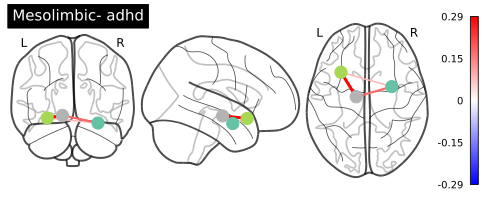

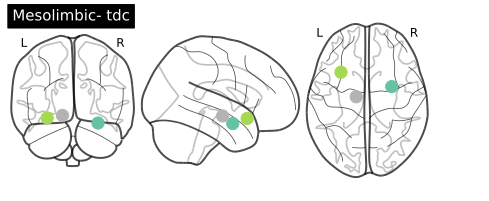

In [74]:
adhd3 = 4
adhd1 = 66
tdc = 63

# Create masker object to extract average signal within spheres
from nilearn.input_data import NiftiSpheresMasker
masker = NiftiSpheresMasker(sphere_center, radius=3, detrend=True,
                            standardize=True, low_pass=0.1, high_pass=0.01,
                            t_r=2.0, verbose=1, memory="nilearn_cache", memory_level=2)

# Extract average signal in spheres with masker object
time_series_adhd = masker.fit_transform(rest_files_peking123_013[adhd3])
time_series_tdc = masker.fit_transform(rest_files_peking123_013[tdc])

from nilearn.connectome import ConnectivityMeasure
connectivity_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrix_adhd = connectivity_measure.fit_transform([time_series_adhd])[0]
partial_correlation_matrix_tdc = connectivity_measure.fit_transform([time_series_tdc])[0]

from nilearn.plotting import plot_connectome
plot_connectome(partial_correlation_matrix_adhd, sphere_center,
                display_mode='ortho', colorbar=True,  node_size=150,
                title="Mesolimbic- adhd")
plot_connectome(partial_correlation_matrix_tdc, sphere_center,
                display_mode='ortho', colorbar=True,  node_size=150,
                title="Mesolimbic- tdc")

In [ ]:
# Mask the main diagonal for visualization:
np.fill_diagonal(partial_correlation_matrix_adhd, 0)
#partial_correlation_matrix_adhd = np.where(partial_correlation_matrix_adhd<0.0,0.0,partial_correlation_matrix_adhd)
# Plot correlation matrix - note: matrix is ordered for block-like representation
plotting.plot_matrix(partial_correlation_matrix_adhd, figure=(4,4), labels=labels,
                     vmax=0.8, vmin=-0.8, reorder=False);

# Mask the main diagonal for visualization:
np.fill_diagonal(partial_correlation_matrix_tdc, 0)
#partial_correlation_matrix_tdc = np.where(partial_correlation_matrix_tdc<0.0,0.0,partial_correlation_matrix_tdc)

# Plot correlation matrix - note: matrix is ordered for block-like representation
plotting.plot_matrix(partial_correlation_matrix_tdc, figure=(4,4), labels=labels,
                     vmax=0.8, vmin=-0.8, reorder=False);

#### dmn - peking 123 - class 0, 3 - only +ve corr

In [75]:
len(rest_files_peking123_03)

43

In [81]:
n=43
#only tdc & adhd3 no sec dx , neg corr included
peking123_mist_test_44_03 = exp(rest_files=rest_files_peking123_03[:n],
                        sphere_center=sphere_center,
                        sphere_radius=3,
                        node_label_dict=lbldct,
                        subject_idx=sub_idx123_03[:n], 
                        class_factor=class_factor123_03[:n],
                        remove_neg_corr=True
                       )

Subject 0

Subject 1

Subject 2

Subject 3

Subject 4

Subject 5

Subject 6

Subject 7

Subject 8

Subject 9

Subject 10

Subject 11

Subject 12

Subject 13

Subject 14

Subject 15

Subject 16

Subject 17

Subject 18

Subject 19

Subject 20

Subject 21

Subject 22

Subject 23

Subject 24

Subject 25

Subject 26

Subject 27

Subject 28

Subject 29

Subject 30

Subject 31

Subject 32

Subject 33

Subject 34

Subject 35

Subject 36

Subject 37

Subject 38

Subject 39

Subject 40

Subject 41

Subject 42



In [82]:
p_val(peking123_mist_test_44_03)

t-statistic: 0.09904652414993789
p-value: 0.9215840227264949


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


43
43


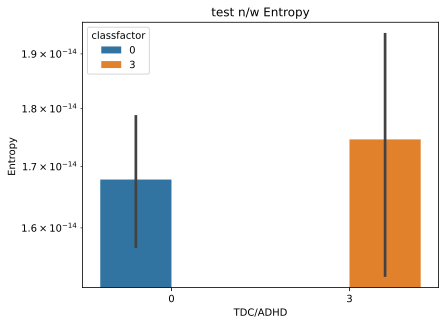

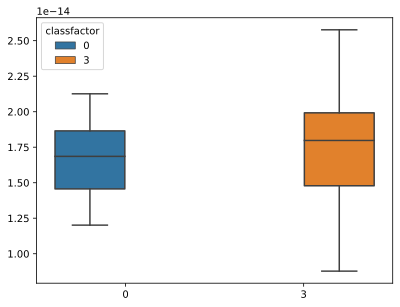

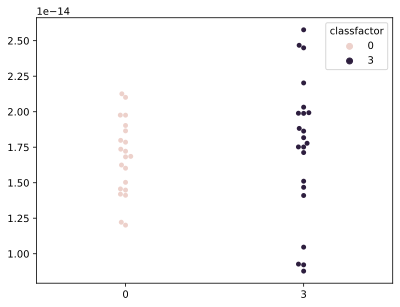

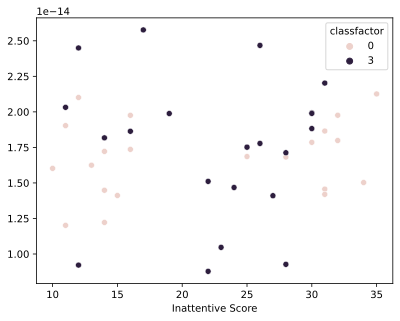

In [83]:
x = []
y = []
qpfval = []
phenotype = phenotype_peking123_013
adhd_index = phenotype['Inattentive'].values
peking = peking123_mist_test_44_03
for index, row in peking.iterrows():
        x.append(row['classfactor'])
        y.append(row['entropy'])
print(len(x))
print(len(y))
#print(y)        
plt.title('test n/w Entropy')
plt.yscale('log')
plt.ylabel('Entropy ')
plt.xlabel('TDC/ADHD')
plt.legend(loc='upper right')
#plt.yscale('log')

sns.barplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

sns.boxplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

sns.swarmplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

plt.xlabel('Inattentive Score')
sns.scatterplot(x=adhd_index[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

#### neg corr included

In [168]:
len(rest_files_peking123_03)

43

In [169]:
sphere_dict = { 
    'Precuneus and PCC':(0.7,-48.75,32.07),
    'left_POSTERIOR_CINGULATE_CORTEX':(-10.24,-44.68,36.43),
    #'left_ANTERIOR_CINGULATE_CORTEX_dorsal':(-6.8,21.32,28.29),
    'Dorsomedial pfc post':(0.02,30.65,40.42),
    #'Ventromedial pfc':(0.14,51.14,-8.9),
    #'Dorsomedial pfc ant':(1.39,56.87,18.08),
    'L Inferior parietal':(-49.7,-56.98,37.77),
    #'left_FUSIFORM_GYRUS_dorsolateral':(-49.54,-66.23,8.35),
    #'left_MIDDLE_FRONTAL_GYRUS_posterorostral':(-41.13,17.73,39.99)
    #'left_CEREBELLUM_VERMIS':(-8.62,-45.04,-8.64)
 }

sphere_radius = 3
labels = []
sphere_center = []
lbldct = {}
for i,(roi,coords) in enumerate(sphere_dict.items()):
    lbldct[i] = roi
    sphere_center.append(coords)
    labels.append(roi)
#
#t-statistic: 2.4876498902801423
#p-value: 0.016913535795888175

In [170]:
sphere_dict

{'Precuneus and PCC': (0.7, -48.75, 32.07),
 'left_POSTERIOR_CINGULATE_CORTEX': (-10.24, -44.68, 36.43),
 'Dorsomedial pfc post': (0.02, 30.65, 40.42),
 'L Inferior parietal': (-49.7, -56.98, 37.77)}

In [171]:
n=43
#only tdc & adhd3 no sec dx , neg corr included
peking123_mist_test_44_03_negcorr = exp(rest_files=rest_files_peking123_03[:n],
                        sphere_center=sphere_center,
                        sphere_radius=3,
                        node_label_dict=lbldct,
                        subject_idx=sub_idx123_03[:n], 
                        class_factor=class_factor123_03[:n],
                        remove_neg_corr=False
                       )



Subject 0

Subject 1

Subject 2

Subject 3

Subject 4

Subject 5

Subject 6

Subject 7

Subject 8

Subject 9

Subject 10

Subject 11

Subject 12

Subject 13

Subject 14

Subject 15

Subject 16

Subject 17

Subject 18

Subject 19

Subject 20

Subject 21

Subject 22

Subject 23

Subject 24

Subject 25

Subject 26

Subject 27

Subject 28

Subject 29

Subject 30

Subject 31

Subject 32

Subject 33

Subject 34

Subject 35

Subject 36

Subject 37

Subject 38

Subject 39

Subject 40

Subject 41

Subject 42



In [172]:
p_val(peking123_mist_test_44_03_negcorr)

t-statistic: 2.3199809066160393
p-value: 0.02539817223785417


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


43
43


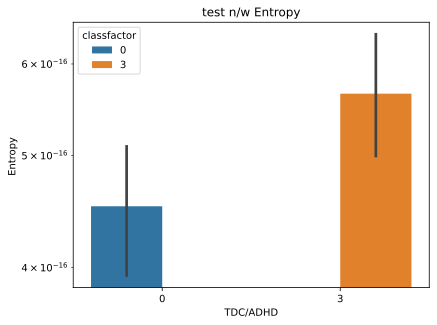

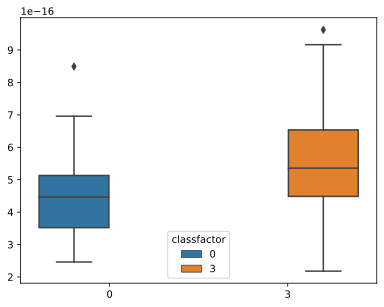

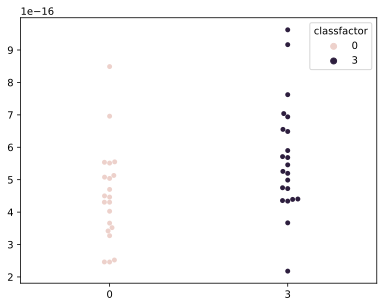

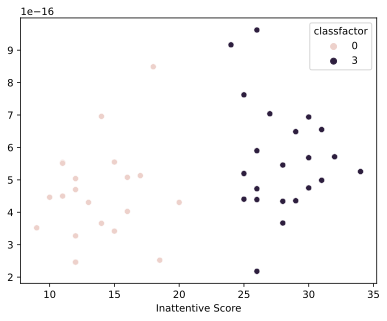

In [173]:
x = []
y = []
qpfval = []
phenotype = phenotype_peking123_03
adhd_index = phenotype['Inattentive'].values
peking = peking123_mist_test_44_03_negcorr
for index, row in peking.iterrows():
        x.append(row['classfactor'])
        y.append(row['entropy']/22)
print(len(x))
print(len(y
#print(y)        
plt.title('test n/w Entropy')
plt.yscale('log')
plt.ylabel('Entropy ')
plt.xlabel('TDC/ADHD')
plt.legend(loc='upper right')
#plt.yscale('log')

sns.barplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

sns.boxplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

sns.swarmplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

plt.xlabel('Inattentive Score')
sns.scatterplot(x=adhd_index[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

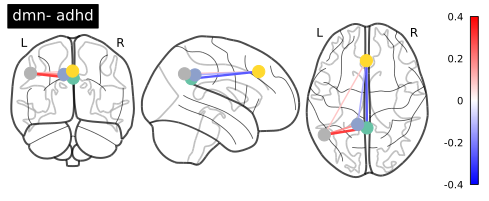

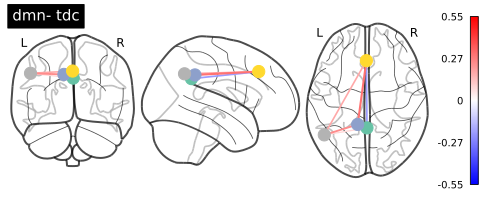

In [244]:
adhd3 = 4
adhd1 = 66
tdc = 63

# Create masker object to extract average signal within spheres
from nilearn.input_data import NiftiSpheresMasker
masker = NiftiSpheresMasker(sphere_center, radius=3, detrend=True,
                            standardize=True, low_pass=0.1, high_pass=0.01,
                            t_r=2.0, verbose=1, memory="nilearn_cache", memory_level=2)

# Extract average signal in spheres with masker object
time_series_adhd = masker.fit_transform(rest_files_peking123_013[adhd3])
time_series_tdc = masker.fit_transform(rest_files_peking123_013[tdc])

from nilearn.connectome import ConnectivityMeasure
connectivity_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrix_adhd = connectivity_measure.fit_transform([time_series_adhd])[0]
partial_correlation_matrix_tdc = connectivity_measure.fit_transform([time_series_tdc])[0]

from nilearn.plotting import plot_connectome
plot_connectome(partial_correlation_matrix_adhd, sphere_center,
                display_mode='ortho', colorbar=True,  node_size=150,
                title="dmn- adhd")
plot_connectome(partial_correlation_matrix_tdc, sphere_center,
                display_mode='ortho', colorbar=True,  node_size=150,
                title="dmn- tdc")

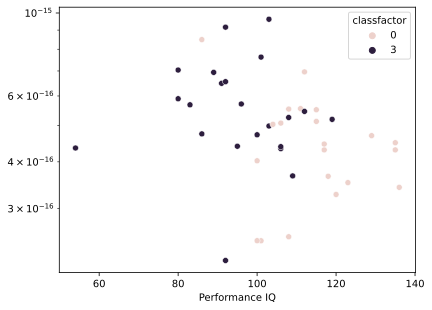

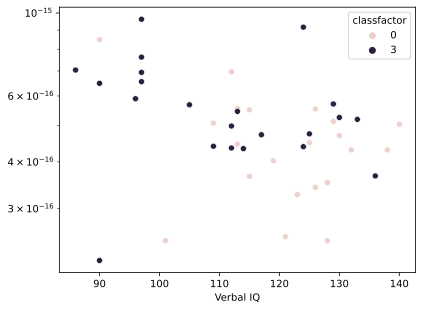

In [183]:
###IMP: low perf and verbal IA --> higher entropy

col = 'Performance IQ'
adhd_index = phenotype[col].values

plt.xlabel(col)
plt.yscale('log')
sns.scatterplot(x=adhd_index[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

col = 'Verbal IQ'
plt.xlabel(col)
plt.yscale('log')
adhd_index = phenotype[col].values
sns.scatterplot(x=adhd_index[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

In [209]:
peking123_mist_test_44_03_negcorr.columns

Index(['Subject', 'classfactor', 'agegroup', 'TimeSeries',
       'PartialCorrelation', 'FullPCorr', 'Laplacian', 'Graph', 'QP',
       'QPExactResult', 'Hamiltonian', 'HamiltonianExactResult', 'entropy',
       'scipy_entropy', 'QAOAResult'],
      dtype='object')

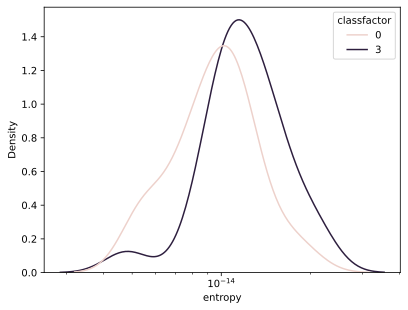

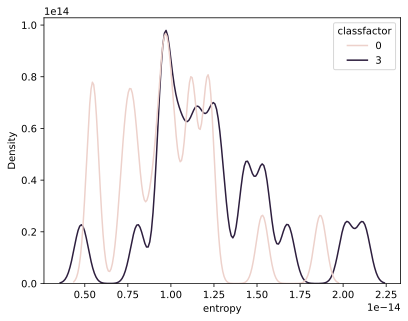

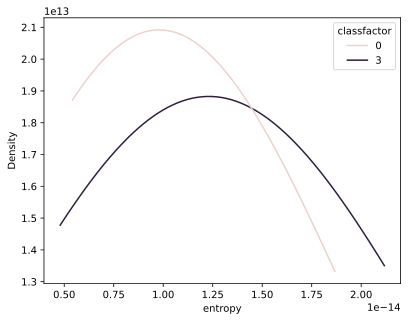

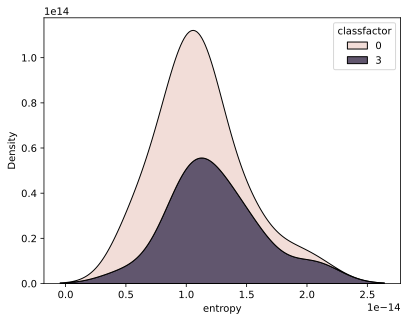

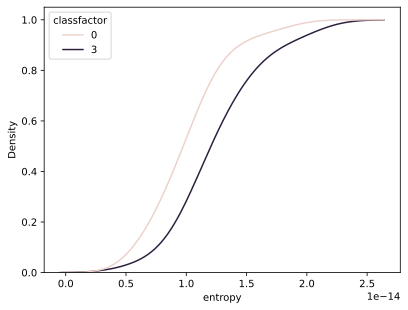

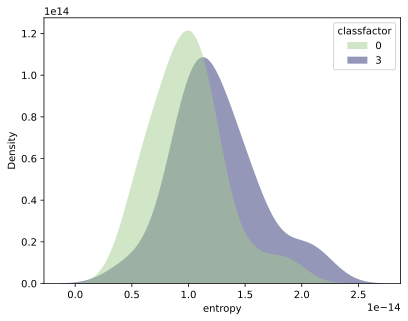

In [229]:
x = []
y = []
qpfval = []
phenotype = phenotype_peking123_03

col = 'Performance IQ'
adhd_index = phenotype[col].values


peking = peking123_mist_test_44_03_negcorr
col = 'Performance IQ'
adhd_index = phenotype[col].values


#sns.catplot(data=peking, y='entropy', x=adhd_index, hue='classfactor')
#plt.yscale('log')

sns.kdeplot(data=peking, x="entropy", hue='classfactor',log_scale=True)
plt.show()

sns.kdeplot(data=peking, x="entropy", hue='classfactor',bw_adjust=.2)
plt.show()

sns.kdeplot(data=peking, x="entropy", hue='classfactor',bw_adjust=5, cut=0)
plt.show()

sns.kdeplot(data=peking, x="entropy", hue='classfactor',multiple="stack")
plt.show()


sns.kdeplot(data=peking, x="entropy", hue='classfactor',
            cumulative=True, common_norm=False, common_grid=True)
plt.show()

sns.kdeplot(data=peking, x="entropy", hue='classfactor',
            fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

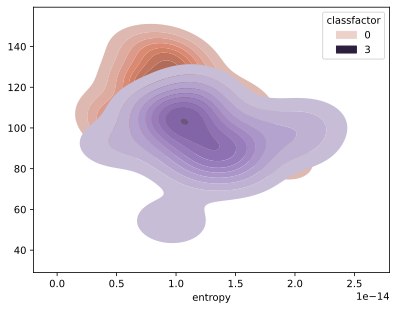

/Users/hema/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


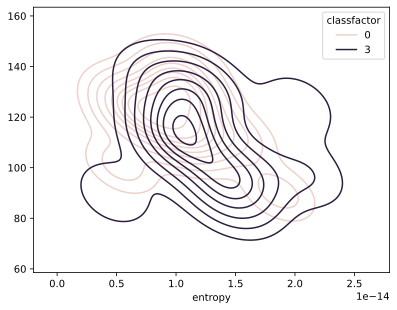

In [242]:
col = 'Performance IQ'
adhd_index = phenotype[col].values
sns.kdeplot(data=peking, x="entropy", y=adhd_index, hue='classfactor', fill=True)
plt.show()

col = 'Verbal IQ'
adhd_index = phenotype[col].values
sns.kdeplot(data=peking, x="entropy", y=adhd_index, hue='classfactor', fill=False,
           cmap='mako')
plt.show()

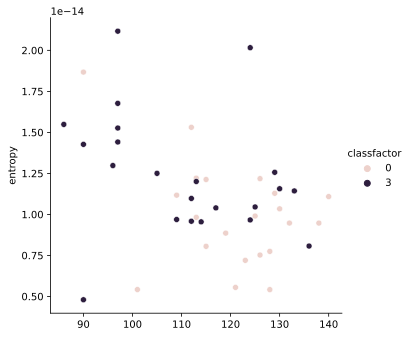

In [241]:

#TODO: get these plots for all adhd scores
col = 'Verbal IQ'
adhd_index = phenotype[col].values
sns.relplot(data=peking, y="entropy", x=adhd_index, hue='classfactor',)
plt.show()


### Subcortical network

In [251]:
#MIST 122
#Sub cortical
sc_sphere_dict = { 
    #'PUTAMEN_anterior':(1.23,6.63,-2.38),
    #'PUTAMEN_posterior':(-2.8,-2.14,4.11),
    'CAUDATE_dorsal':(-3.08,4.85,17.6),
    'CAUDATE_ventral':(3.95,20.63,-1.68),
    'THALAMUS_dorsal':(1.71,-16.05,9.2),
    'THALAMUS_ventral':(-0.65,-21.14,1.75),
    'HIPPOCAMPUS':(-4.48,-30.96,-6.26),
    #'CAUDATE':(-0.85,10.17,8.33),
    'AMYGDALA':(3.06,-7.47,-19.9),
    
    #'CAUDATE_NUCLEUS_HEAD_and_NUCLEUS_ACCUMBENS':(-0.84,11.28,-11.21),
    #'Dorsomedial pfc post':(0.02,30.65,40.42),
    #'left_VENTROLATERAL_PREFRONTAL_CORTEX': (-48.62,28.05,-0.46)
   
}

sclabels = []
sc_sphere_center = []
sclbldct = {}
for i,(roi,coords) in enumerate(sc_sphere_dict.items()):
    sclbldct[i] = roi
    sc_sphere_center.append(coords)
    sclabels.append(roi)

#t-statistic: -0.021190523383639418
#p-value: 0.9831964680476862 # with neg corr 

#t-statistic: 1.8335946244862003
#p-value: 0.07398051353014909  # no neg corr

In [252]:
sc_sphere_dict
#t-statistic: 2.317877445179392
#p-value: 0.02552355772834145 # no neg corr

#t-statistic: -0.509535875751969
#p-value: 0.6131084478550086 #with neg corr

{'CAUDATE_dorsal': (-3.08, 4.85, 17.6),
 'CAUDATE_ventral': (3.95, 20.63, -1.68),
 'THALAMUS_dorsal': (1.71, -16.05, 9.2),
 'THALAMUS_ventral': (-0.65, -21.14, 1.75),
 'HIPPOCAMPUS': (-4.48, -30.96, -6.26),
 'AMYGDALA': (3.06, -7.47, -19.9)}

In [253]:
#only tdc & adhd3 no sec dx , neg corr included
peking123_sc_44_03 = exp(rest_files=rest_files_peking123_03[:n],
                        sphere_center=sc_sphere_center,
                        sphere_radius=3,
                        node_label_dict=sclbldct,
                        subject_idx=sub_idx123_03[:n], 
                        class_factor=class_factor123_03[:n],
                         remove_neg_corr=True
                       )

Subject 0

Subject 1

Subject 2

Subject 3

Subject 4

Subject 5

Subject 6

Subject 7

Subject 8

Subject 9

Subject 10

Subject 11

Subject 12

Subject 13

Subject 14

Subject 15

Subject 16

Subject 17

Subject 18

Subject 19

Subject 20

Subject 21

Subject 22

Subject 23

Subject 24

Subject 25

Subject 26

Subject 27

Subject 28

Subject 29

Subject 30

Subject 31

Subject 32

Subject 33

Subject 34

Subject 35

Subject 36

Subject 37

Subject 38

Subject 39

Subject 40

Subject 41

Subject 42



In [254]:
p_val_cf(peking123_sc_44_03, 0, 3)

t-statistic: 2.3178774451793034
p-value: 0.025523557728346784


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


43
43


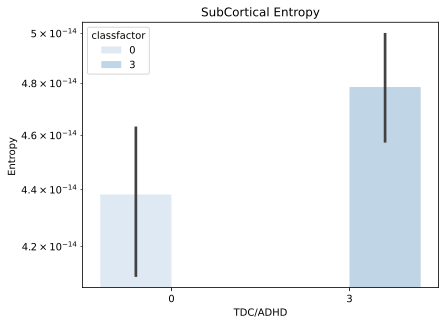

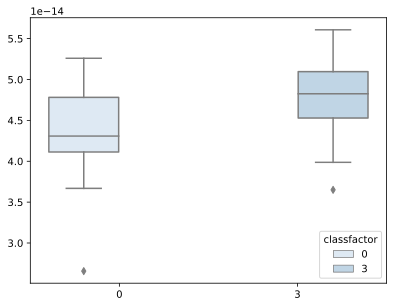

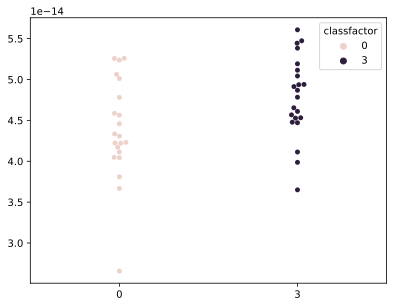

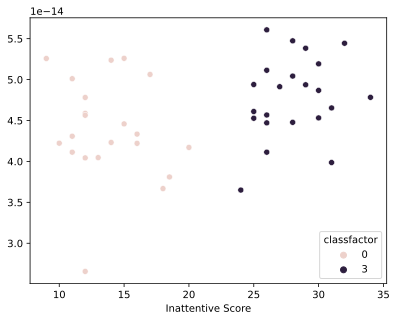

In [255]:
#44- only tdc and adhd3, sec dx removed , neg corr included
x = []
y = []
qpfval = []
phenotype = phenotype_peking123_03
adhd_index = phenotype[((phenotype['DX']==0)|(phenotype['DX']==3))]['Inattentive'].values
peking = peking123_sc_44_03
for index, row in peking[((peking['classfactor']==0)|(peking['classfactor']==3))].iterrows():
        x.append(row['classfactor'])
        y.append(row['entropy'])
print(len(x))
print(len(y))
#print(y)        
plt.title('SubCortical Entropy')
plt.yscale('log')
plt.ylabel('Entropy ')
plt.xlabel('TDC/ADHD')
plt.legend(loc='upper right')

sns.barplot(x=x[:n], y=y[:n], hue=peking['classfactor'][:n]) 
plt.show()

sns.boxplot(x=x[:n], y=y[:n], hue=peking['classfactor'][:n]) 
plt.show()

sns.swarmplot(x=x[:n], y=y[:n], hue=peking['classfactor'][:n]) 
plt.show()

plt.xlabel('Inattentive Score')
sns.scatterplot(x=adhd_index[:n], y=y[:n], hue=peking['classfactor'][:n]) 
plt.show()


#### Executive network

In [76]:
sphere_dict = {
     'Medial frontal gyrus':   (3 ,30,-15),
      'Anterior cingulate cortex':  (-9 ,18 ,24),
    'Superior medial frontal gyrus': (-12, -3, 63),
    #'Midde temporal gyrus':(63 ,-6 ,-21),
    #'Thalamus':(-28,-24,6),
    #'Posterior fusiform gyrus':(-36,-48 ,-12),
    #'Posterior cingulate cortex':(-24,-66, 21),
    #'Precuneus':(6,-78, 33)
    #'L ventral striatum':(-14.6,11.4,-5.4)
    'l pallidum': (-24, -3, -3),
    'l NAcc':(-15,3,-9),
    'l caudate':(-12,15,0 ),
    #'l subthalamic nucleus':(-9,-12,-3)
}

#t-statistic: -1.80300300682715
#p-value: 0.07874082664150012 #with neg corr

In [78]:
n=43

#only tdc & adhd3 no sec dx , neg corr included
peking123_exec_44_03 = exp(rest_files=rest_files_peking123_03[:n],
                        sphere_center=sc_sphere_center,
                        sphere_radius=3,
                        node_label_dict=sclbldct,
                        subject_idx=sub_idx123_03[:n], 
                        class_factor=class_factor123_03[:n],
                           remove_neg_corr=False
                       )

NameError: name 'sc_sphere_center' is not defined

In [80]:
p_val_cf(peking123_exec_44_03, 0, 3)

t-statistic: 2.3178774451796573
p-value: 0.02552355772832561


#### Salience network

In [95]:
power_sal_sphere_dict = {
                       'sal1':  (11,-39,50),
                       'sal2':  (55,-45,37),
                       'sal3':  (42,0,47),
                       'sal4': (31,33,26),
                       'sal5': (48,22,10),
                       'sal6': (-35,20,0),
                       'sal7': (36,22,3),
                       'sal8': (37,32,-2),
                       'sal9': (34,16,-8),
                       'sal10': (-11,26,25),
                       'sal11': (-1,15,44),
                       'sal12': (-28,52,21),
                       'sal13': (0,30,27),
                       'sal14': (5,23,37),
                       'sal15': (10,22,27),
                       'sal16': (31,56,14),
                       'sal17': (26,50,27),
                       'sal18': (-39,51,17)
    }
    
power_sallabels = []
power_sal_sphere_center = []
power_sallbldct = {}
for i,(roi,coords) in enumerate(power_sal_sphere_dict.items()):
    power_sallbldct[i] = roi
    power_sal_sphere_center.append(coords)
    power_sallabels.append(roi)
    
#t-statistic: -0.41589939566065676
#p-value: 0.6796525591592404 # with neg corr

n=43

In [97]:
#only tdc & adhd3 no sec dx , neg corr included
peking123_sal_power_44_03 = exp(rest_files=rest_files_peking123_03[:n],
                        sphere_center=power_sal_sphere_center[:12],
                        sphere_radius=3,
                        node_label_dict=power_sal_sphere_dict,
                        subject_idx=sub_idx123_03[:n], 
                        class_factor=class_factor123_03[:n],
                         remove_neg_corr=True       
                       )

Subject 0

Subject 1

Subject 2

Subject 3

Subject 4

Subject 5

Subject 6

Subject 7

Subject 8

Subject 9

Subject 10

Subject 11

Subject 12

Subject 13

Subject 14

Subject 15

Subject 16

Subject 17

Subject 18

Subject 19

Subject 20

Subject 21

Subject 22

Subject 23

Subject 24

Subject 25

Subject 26

Subject 27

Subject 28

Subject 29

Subject 30

Subject 31

Subject 32

Subject 33

Subject 34

Subject 35

Subject 36

Subject 37

Subject 38

Subject 39

Subject 40

Subject 41

Subject 42



In [98]:
p_val_cf(peking123_sal_power_44_03, 0, 3)

t-statistic: -0.41589939566065676
p-value: 0.6796525591592404


In [ ]:
#44- only tdc and adhd3, sec dx removed , neg corr included
x = []
y = []
qpfval = []
phenotype = phenotype_peking123_03
adhd_index = phenotype[((phenotype['DX']==0)|(phenotype['DX']==3))]['Inattentive'].values
#qaoa = [peking123_dmn['QAOAResult'].values]
#x = adhd_index
#print(len(x))
#y = qaoa
peking = peking123_sal_power_44_03
for index, row in peking[((peking['classfactor']==0)|(peking['classfactor']==3))].iterrows():
    
    #if row['HamiltonianExactResult']!=np.nan:
        #print(row['QAOAResult'].fval)
        #y.append(row['QPExactResult'].fval)
        qpfval.append(row['QPExactResult'].fval)
        x.append(row['classfactor'])
        y.append(row['entropy'])
print(len(x))
print(len(y))
#print(y)        
plt.title('Dorsal Attention-Power Entropy')
plt.yscale('log')
plt.ylabel('Entropy ')
plt.xlabel('TDC/ADHD')
plt.legend(loc='upper right')
#plt.yscale('log')

sns.barplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

sns.boxplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

sns.swarmplot(x=x[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()

plt.xlabel('Inattentive Score')
sns.scatterplot(x=adhd_index[:n], y=y[:len(x)], hue=peking['classfactor'][:len(x)]) 
plt.show()
